In [1]:
import nflfastpy as npy
import matplotlib.pyplot as plt
import matplotlib.patheffects as patheffects
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
import urllib
from PIL import Image

### Dynamically Load Font `Poppins` - from [Google Fonts](https://fonts.google.com/specimen/Poppins)

In [2]:
font_paths = [
    "../../fonts/Poppins-Regular.ttf",
    "../../fonts/Poppins-Medium.ttf",
    "../../fonts/Poppins-SemiBold.ttf",
    "../../fonts/Poppins-Bold.ttf"
]

for path in font_paths:
    fm.fontManager.addfont(path)
    fm.FontProperties(fname=path)

### Load team color and logo data

In [3]:
team_logo_df = npy.load_team_logo_data()

### Load 2021 play-by-play data

In [4]:
df = npy.load_pbp_data(2021)

### Get Deebo Samuel rushing and receiving data

In [5]:
df_deebo = df[
    (df["rusher_player_name"] == "D.Samuel") | 
    (df["receiver_player_name"] == "D.Samuel") &
    (df["incomplete_pass"] == 0) &
    (df["interception"] == 0) & 
    (df["season_type"] == "REG")
].copy()

In [6]:
df_deebo

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
2759,1026,2021_01_SF_DET,2021091204,DET,SF,REG,1,SF,away,DET,...,0,1,2.235091,0.363803,5.511636,3.0,1.000000,1.000000,0.718925,28.107512
2760,1054,2021_01_SF_DET,2021091204,DET,SF,REG,1,SF,away,DET,...,0,1,0.554130,0.430087,3.992669,2.0,0.982975,0.277121,0.496457,50.354278
2777,1443,2021_01_SF_DET,2021091204,DET,SF,REG,1,SF,away,DET,...,0,1,1.370228,0.291785,4.118719,2.0,1.000000,1.000000,0.439073,56.092697
2779,1488,2021_01_SF_DET,2021091204,DET,SF,REG,1,SF,away,DET,...,1,1,1.389195,1.066870,2.576346,2.0,0.751286,0.426213,0.707250,29.275018
2796,1876,2021_01_SF_DET,2021091204,DET,SF,REG,1,SF,away,DET,...,1,1,1.757783,0.640567,10.739427,9.0,0.619697,0.259430,0.813241,18.675858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43937,1881,2021_17_HOU_SF,2022010211,SF,HOU,REG,17,SF,home,HOU,...,0,0,0.594526,0.195240,3.885799,2.0,0.999253,0.961450,0.907262,9.273809
43947,2155,2021_17_HOU_SF,2022010211,SF,HOU,REG,17,SF,home,HOU,...,0,0,-0.484671,NaN,NaN,NaN,NaN,NaN,0.742059,-74.205858
43991,3250,2021_17_HOU_SF,2022010211,SF,HOU,REG,17,SF,home,HOU,...,0,0,4.204701,0.895086,6.211236,5.0,1.000000,1.000000,0.380153,61.984688
44009,3674,2021_17_HOU_SF,2022010211,SF,HOU,REG,17,SF,home,HOU,...,0,0,-0.062377,NaN,NaN,NaN,NaN,NaN,0.112512,-11.251180


### Total rushing yards

In [7]:
print(f"Deebo Samuel rushing yards: {df_deebo['rushing_yards'].sum()}")

Deebo Samuel rushing yards: 320.0


### Total receiving yards

In [8]:
print(f"Deebo Samuel receiving yards: {df_deebo['receiving_yards'].sum()}")

Deebo Samuel receiving yards: 1310.0


In [9]:
df_deebo_agg = (
    df_deebo.groupby(["game_date", "week", "defteam"], as_index=False)
    .agg(
        {
            "rushing_yards": "sum",
            "air_yards": "sum",
            "yards_after_catch": "sum",
            "receiving_yards": "sum",
            "yards_gained": "sum",
            "touchdown": "sum"
        }
    )
)

In [10]:
df_deebo_agg["pace"] = (18 - df_deebo_agg["week"].max() + df_deebo_agg.shape[0]) * df_deebo_agg["receiving_yards"].cumsum() / (df_deebo_agg.index + 1)

In [11]:
df_deebo_agg

,game_date,week,defteam,rushing_yards,air_yards,yards_after_catch,receiving_yards,yards_gained,touchdown,pace
0,2021-09-12,1,DET,0.0,80.0,109.0,189.0,189.0,1.0,3024.000000
1,2021-09-19,2,PHI,8.0,47.0,46.0,93.0,101.0,0.0,2256.000000
2,2021-09-26,3,GB,0.0,23.0,29.0,52.0,52.0,0.0,1781.333333
3,2021-10-03,4,SEA,1.0,70.0,86.0,156.0,157.0,2.0,1960.000000
4,2021-10-10,5,ARI,13.0,38.0,20.0,58.0,71.0,1.0,1753.600000
5,2021-10-24,7,IND,0.0,71.0,29.0,100.0,100.0,1.0,1728.000000
6,2021-10-31,8,CHI,0.0,74.0,97.0,171.0,171.0,0.0,1872.000000
7,2021-11-07,9,ARI,0.0,16.0,47.0,63.0,63.0,0.0,1764.000000
8,2021-11-15,10,LA,36.0,41.0,56.0,97.0,133.0,2.0,1740.444444
9,2021-11-21,11,JAX,79.0,9.0,6.0,15.0,94.0,1.0,1590.400000


### Get 49ers color data

In [12]:
sf_logo_data = team_logo_df[team_logo_df["team_abbr"] == "SF"].copy()

In [13]:
c1 = sf_logo_data["team_color"].values[0]
c2 = sf_logo_data["team_color2"].values[0]
c3 = sf_logo_data["team_color3"].values[0]
c4 = sf_logo_data["team_color4"].values[0]
bg = "#e4dbc5"

In [14]:
df_roster = npy.load_roster_data(2021)
df_deebo_metadata = df_roster[df_roster["full_name"] == "Deebo Samuel"].copy()

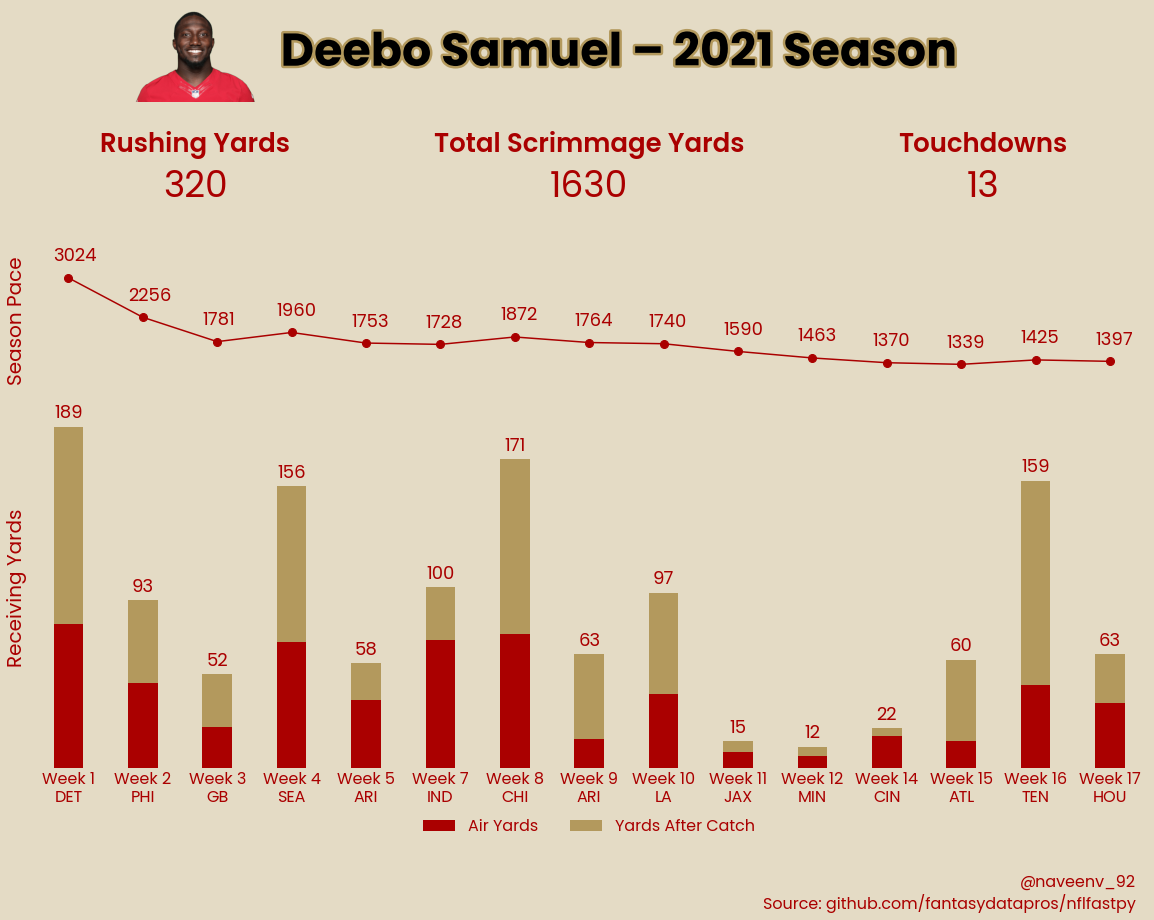

In [18]:
# Plot parameters
plt.rcParams["font.family"] = "Poppins"
plt.rcParams["font.size"] = 16
plt.rcParams["font.weight"] = 400
plt.rcParams["text.color"] = c1
plt.rcParams["axes.labelcolor"] = c1
plt.rcParams["xtick.color"] = c1
plt.rcParams["xtick.major.size"] = 0
plt.rcParams["ytick.color"] = c1
plt.rcParams["ytick.major.size"] = 0

# Create figure and gridspec
fig = plt.figure(figsize=(20, 14), facecolor=bg)
gs = fig.add_gridspec(6, 3, hspace=0.4)

# Create axes objects and remove frame
ax1 = fig.add_subplot(gs[3:,:])
ax2 = fig.add_subplot(gs[2, :])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[0, 0])
ax7 = fig.add_subplot(gs[0, 1:])
ax1.set_frame_on(False)
ax2.set_frame_on(False)
ax3.set_frame_on(False)
ax4.set_frame_on(False)
ax5.set_frame_on(False)
ax6.set_frame_on(False)
ax7.set_frame_on(False)

# Metadata
xmin = -0.5
xmax = df_deebo_agg.shape[0] - 0.5
overall_pace = 17 * df_deebo_agg["receiving_yards"].sum() / df_deebo_agg.shape[0]

## Plot air yards and YAC
labels = [f"Week {i}\n{j}" for (i,j) in zip(df_deebo_agg["week"], df_deebo_agg["defteam"])] 
ax1.bar(range(df_deebo_agg.shape[0]), df_deebo_agg["air_yards"], width=0.4, color=c1, tick_label=labels, label="Air Yards")
ax1.bar(range(df_deebo_agg.shape[0]), df_deebo_agg["yards_after_catch"], width=0.4, bottom=df_deebo_agg["air_yards"], color=c2, label="Yards After Catch")

for i, yds in enumerate(df_deebo_agg["receiving_yards"]):
    ax1.text(i, yds + 2, int(yds), ha="center", va="bottom", size=18)

ax1.set_yticks([])

ax1.set(xlim=[xmin, xmax], ylim=[0, 200])
ax1.set_ylabel("Receiving Yards", size=20)
    
ax1.legend(loc="upper center", bbox_to_anchor=[0.5, -0.1], ncol=2, frameon=False)

## Plot pace of receiving yards
#ax2.plot([xmin, xmax], [overall_pace, overall_pace], color=c1, linestyle="--")
ax2.plot(range(df_deebo_agg.shape[0]), df_deebo_agg["pace"], color=c1, marker="o", markersize=8)

for i, pace in enumerate(df_deebo_agg["pace"]):
    ax2.text(i - 0.2, pace + 225, int(pace), ha="left", va="bottom", size=18)


ax2.set(xticks=[], yticks=[])
ax2.set_ylabel("Season Pace", size=20)

ax2.set(xlim=[xmin, xmax])

## Total Rushing Yards
ax3.text(0.5, 0.5, df_deebo_agg['rushing_yards'].sum().astype(int), ha="center", va="center", size=36)
ax3.text(0.5, 0.8, "Rushing Yards", ha="center", va="bottom", size=26, fontweight=600)

ax3.set(xticks=[], yticks=[])

## Scrimmage Yards
ax4.text(0.5, 0.5, df_deebo_agg['yards_gained'].sum().astype(int), ha="center", va="center", size=36)
ax4.text(0.5, 0.8, "Total Scrimmage Yards", ha="center", va="bottom", size=26, fontweight=600)

ax4.set(xticks=[], yticks=[])

## Total Touchdowns
ax5.text(0.5, 0.5, df_deebo_agg['touchdown'].sum().astype(int), ha="center", va="center", size=36)
ax5.text(0.5, 0.8, "Touchdowns", ha="center", va="bottom", size=26, fontweight=600)

ax5.set(xticks=[], yticks=[])

## Headshot
urllib.request.urlretrieve(df_deebo_metadata["headshot_url"].values[0], "deebo.png")
img = Image.open("deebo.png")
ax6.imshow(img)

ax6.set(xticks=[], yticks=[])

## Title
ax7.text(-0.2, 0.5, "Deebo Samuel – 2021 Season", ha="left", va="center", color=c3, size=46, weight=800, path_effects=[patheffects.withStroke(linewidth=5, foreground=c2)])

ax7.set(xticks=[], yticks=[])

# Add source
ax1.text(0.99, -0.4, "@naveenv_92\nSource: github.com/fantasydatapros/nflfastpy", ha="right", va="bottom", size=16, transform=ax1.transAxes)

# Save and show figure
plt.savefig("deebo_samuel_receiving.png", dpi=500, bbox_inches="tight")
plt.show()